In [1]:
#importing the libraries ad mounting the google drive
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from google.colab import drive
drive.mount('/content/gdrive/') 

Mounted at /content/gdrive/


In [3]:
#creating dataframes for training testing and validation
traindata = pd.read_csv('/content/gdrive/MyDrive/Data/Q1_Train_Data_edited.csv')
valdata   = pd.read_csv('/content/gdrive/MyDrive/Data/Q1_Validation_Data_edited.csv')
testdata  = pd.read_csv('/content/gdrive/MyDrive/Data/Q1_Test_Data_edited.csv')





In [4]:
valdata.head()
testdata.head()


traindata.shape
traindata.head()




,emotion,pixels,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 2265,Unnamed: 2266,Unnamed: 2267,Unnamed: 2268,Unnamed: 2269,Unnamed: 2270,Unnamed: 2271,Unnamed: 2272,Unnamed: 2273,Unnamed: 2274,Unnamed: 2275,Unnamed: 2276,Unnamed: 2277,Unnamed: 2278,Unnamed: 2279,Unnamed: 2280,Unnamed: 2281,Unnamed: 2282,Unnamed: 2283,Unnamed: 2284,Unnamed: 2285,Unnamed: 2286,Unnamed: 2287,Unnamed: 2288,Unnamed: 2289,Unnamed: 2290,Unnamed: 2291,Unnamed: 2292,Unnamed: 2293,Unnamed: 2294,Unnamed: 2295,Unnamed: 2296,Unnamed: 2297,Unnamed: 2298,Unnamed: 2299,Unnamed: 2300,Unnamed: 2301,Unnamed: 2302,Unnamed: 2303,Unnamed: 2304
0,0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,...,20,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,...,150,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184
2,2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,...,225,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152
3,4,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,...,124,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142
4,6,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,...,18,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30


(a). **Visualization**

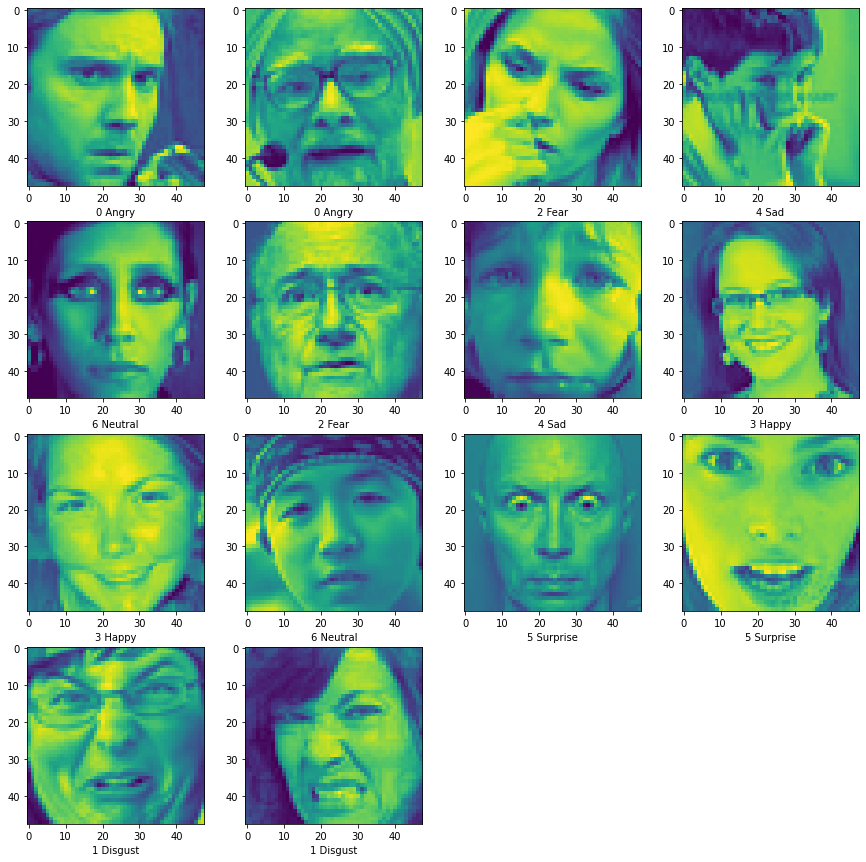

In [5]:
#1
traindata1 = traindata.drop(columns=['emotion'])
em_list = [0,0,1,1,2,2,3,3,4,4,5,5,6,6]
em_dict = {0:"Angry", 1: "Disgust", 2: "Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}   #creating a dictionary for all emotions with respective key values
fig, axs = plt.subplots(3, 3, figsize=(15,15))
j=0
for i,val in enumerate(traindata[traindata.columns[0]]): 

  if(len(em_list)) and (val in em_list):
    em_list.remove(val)
    plt.subplot(4,4,j+1) 
    plt.xlabel(str(val) + " " + em_dict[val])
    img_array = np.asfarray(traindata1.iloc[i])                                   #converting the data to a numpy array
    img = np.reshape(img_array, (48,48))                                          #resizing to get an image of output 48 x 48
    plt.imshow(img)
    j = j + 1
  elif (len(em_list)):
    continue
  else:
    break




(b). **Data exploration**

In [6]:
count = traindata[traindata.columns[0]].value_counts()   #getting the count of images for each emotion
l = []
for i in count.keys():
  l.append((i,em_dict[i], count [i]))
l

[(3, 'Happy', 7215),
 (6, 'Neutral', 4965),
 (4, 'Sad', 4830),
 (2, 'Fear', 4097),
 (0, 'Angry', 3995),
 (5, 'Surprise', 3171),
 (1, 'Disgust', 436)]

**Image Classification with FNNs**

In [7]:
training_images = np.asfarray(traindata1)
training_images = np.reshape(training_images, (len(training_images),48,48))
training_labels = np.asfarray(traindata[traindata.columns[0]])
print(training_images.shape)
valdata1 = valdata.drop(columns=['emotion'])
validation_images = np.asfarray(valdata1)
validation_images = np.reshape(validation_images, (len(validation_images),48,48))
validation_labels = np.asfarray(valdata[valdata.columns[0]])
print(validation_images.shape)
testdata1 = testdata.drop(columns=['emotion'])
testing_images = np.asfarray(testdata1)
testing_images = np.reshape(testing_images, (len(testing_images),48,48))
testing_labels = np.asfarray(testdata[testdata.columns[0]])
print(testing_images.shape)
# Preprocessing: Normalize the images.
training_images = (training_images / 255) - 0.5
validation_images = (validation_images / 255) - 0.5
testing_images = (testing_images / 255) - 0.5

(28709, 48, 48)
(3589, 48, 48)
(3589, 48, 48)


In [ ]:
import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs



#  Define a Feed-Forward Model with 3 hidden layers with dimensions 392 and 196 Neurons
model1 = Sequential([
  Dense(1000, activation='relu', input_shape=(48*48,), name="firsthiddenlayer"), Dropout(0.5),
  Dense(100, activation='relu', name="secondhiddenlayer"), Dropout(0.5),
  Dense(100, activation='relu', name="thirdhiddenlayer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])

#  Validate your Model Architecture
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 firsthiddenlayer (Dense)    (None, 1000)              2305000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 secondhiddenlayer (Dense)   (None, 100)               100100    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 thirdhiddenlayer (Dense)    (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 7)                 7

In [ ]:
# Compile model
model1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# Flatten the images into vectors (1D) for feed forward network
flatten_training_images = training_images.reshape((-1, 48*48))
flatten_testing_images = testing_images.reshape((-1, 48*48))
flatten_validation_images = validation_images.reshape((-1, 48*48))

# Train model

%time model1.fit(flatten_training_images, to_categorical(training_labels), epochs=750, batch_size= 500,)

Epoch 1/750
58/58 [==============================] - 1s 10ms/step - loss: 1.8182 - accuracy: 0.2419
Epoch 2/750
58/58 [==============================] - 1s 10ms/step - loss: 1.8124 - accuracy: 0.2442
Epoch 3/750
58/58 [==============================] - 1s 10ms/step - loss: 1.8061 - accuracy: 0.2476
Epoch 4/750
58/58 [==============================] - 1s 10ms/step - loss: 1.8000 - accuracy: 0.2517
Epoch 5/750
58/58 [==============================] - 1s 10ms/step - loss: 1.7999 - accuracy: 0.2487
Epoch 6/750
58/58 [==============================] - 1s 10ms/step - loss: 1.7946 - accuracy: 0.2575
Epoch 7/750
58/58 [==============================] - 1s 10ms/step - loss: 1.7909 - accuracy: 0.2580
Epoch 8/750
58/58 [==============================] - 1s 10ms/step - loss: 1.7874 - accuracy: 0.2593
Epoch 9/750
58/58 [==============================] - 1s 10ms/step - loss: 1.7865 - accuracy: 0.2602
Epoch 10/750
58/58 [==============================] - 1s 10ms/step - loss: 1.7850 - accuracy: 0.2618

Text(0.5, 1.0, 'Accuracy wrt iterations - Model 1')

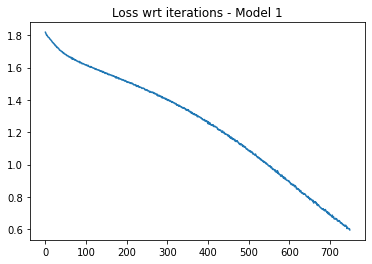

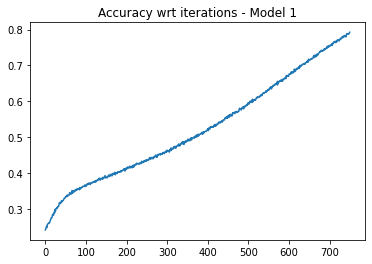

In [ ]:
plt.plot(model1.history.history['loss'])
plt.title('Loss wrt iterations - Model 1')
plt.figure()
plt.plot(model1.history.history['accuracy'])
plt.title('Accuracy wrt iterations - Model 1')

In [ ]:
# Evaluate your model's performance on the test data
performance_training = model1.evaluate(flatten_training_images,to_categorical(training_labels))
print("Accuracy on training samples: {0}".format(performance_training[1]))
performance_validation = model1.evaluate(flatten_validation_images,to_categorical(validation_labels))
print("Accuracy on Val samples: {0}".format(performance_validation[1]))
performance_testdata = model1.evaluate(flatten_testing_images, to_categorical(testing_labels))
print("Accuracy on Test samples: {0}".format(performance_testdata[1]))

898/898 [==============================] - 3s 4ms/step - loss: 0.2788 - accuracy: 0.9387
Accuracy on training samples: 0.938730001449585
113/113 [==============================] - 0s 4ms/step - loss: 1.7244 - accuracy: 0.4536
Accuracy on Val samples: 0.4536082446575165
113/113 [==============================] - 0s 4ms/step - loss: 1.6855 - accuracy: 0.4628
Accuracy on Test samples: 0.4628030061721802


In [ ]:
#model2
import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs



#  Define a Feed-Forward Model with 3 hidden layers with dimensions 392 and 196 Neurons
model2 = Sequential([
  Dense(1000, activation='relu', input_shape=(48*48,), name="firsthiddenlayer"), Dropout(0.5),
  Dense(500, activation='relu', name="secondhiddenlayer"),
  Dense(250, activation='relu', name="thirdhiddenlayer"), Dropout(0.25),
  Dense(100, activation='relu', name="fourthhiddenlayer"),
  Dense(100, activation='relu', name="fifthhiddenlayer"),
  Dense(7, activation='softmax'),
])

#  Validate your Model Architecture
print(model2.summary())
# Compile model
model2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# Flatten the images into vectors (1D) for feed forward network
flatten_training_images = training_images.reshape((-1, 48*48))
flatten_testing_images = testing_images.reshape((-1, 48*48))
flatten_validation_images = validation_images.reshape((-1, 48*48))

# Train model

%time model2.fit(flatten_training_images, to_categorical(training_labels), epochs=750, batch_size= 500,)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 firsthiddenlayer (Dense)    (None, 1000)              2305000   
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 secondhiddenlayer (Dense)   (None, 500)               500500    
                                                                 
 thirdhiddenlayer (Dense)    (None, 250)               125250    
                                                                 
 dropout_6 (Dropout)         (None, 250)               0         
                                                                 
 fourthhiddenlayer (Dense)   (None, 100)               25100     
                                                                 
 fifthhiddenlayer (Dense)    (None, 100)              

Text(0.5, 1.0, 'Accuracy wrt iterations - Model 2')

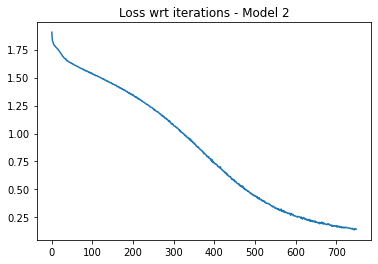

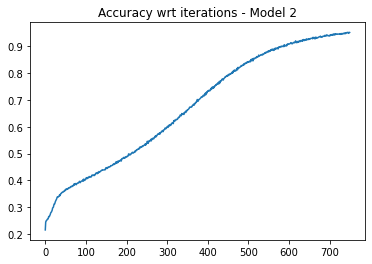

In [ ]:
plt.plot(model2.history.history['loss'])
plt.title('Loss wrt iterations - Model 2')
plt.figure()
plt.plot(model2.history.history['accuracy'])
plt.title('Accuracy wrt iterations - Model 2')



In [ ]:
performance_training = model2.evaluate(flatten_training_images,to_categorical(training_labels))
print("Accuracy on Val samples: {0}".format(performance_training[1]))
performance_testdata = model2.evaluate(flatten_testing_images, to_categorical(testing_labels))
performance_validation = model2.evaluate(flatten_validation_images,to_categorical(validation_labels))
print("Accuracy on Val samples: {0}".format(performance_validation[1]))
print("Accuracy on Test samples: {0}".format(performance_testdata[1]))


898/898 [==============================] - 4s 4ms/step - loss: 0.0180 - accuracy: 0.9949
Accuracy on Val samples: 0.9948796629905701
113/113 [==============================] - 0s 4ms/step - loss: 2.8557 - accuracy: 0.4625
Accuracy on Val samples: 0.4625243842601776
Accuracy on Test samples: 0.4519364833831787


In [ ]:
#model3
import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs



#  Define a Feed-Forward Model with 3 hidden layers with dimensions 392 and 196 Neurons
model3 = Sequential([
  Dense(1000, activation='sigmoid', input_shape=(48*48,), name="firsthiddenlayer"), Dropout(0.5),
  Dense(1000, activation='sigmoid', name="secondhiddenlayer"),
  Dense(1000, activation='sigmoid', name="thirdhiddenlayer"), Dropout(0.25),
  Dense(1000, activation='sigmoid', name="fourthhiddenlayer"),
  Dense(1000, activation='sigmoid', name="fifthhiddenlayer"), Dropout(0.25),
  Dense(1000, activation='sigmoid', name="sixthhiddenlayer"), 

  Dense(7, activation='softmax'),
])

#  Validate your Model Architecture
print(model3.summary())
# Compile model
model3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# Flatten the images into vectors (1D) for feed forward network
flatten_training_images = training_images.reshape((-1, 48*48))
flatten_testing_images = testing_images.reshape((-1, 48*48))
flatten_validation_images = validation_images.reshape((-1, 48*48))

# Train model

%time model3.fit(flatten_training_images, to_categorical(training_labels), epochs=750, batch_size= 500,)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 firsthiddenlayer (Dense)    (None, 1000)              2305000   
                                                                 
 dropout_10 (Dropout)        (None, 1000)              0         
                                                                 
 secondhiddenlayer (Dense)   (None, 1000)              1001000   
                                                                 
 thirdhiddenlayer (Dense)    (None, 1000)              1001000   
                                                                 
 dropout_11 (Dropout)        (None, 1000)              0         
                                                                 
 fourthhiddenlayer (Dense)   (None, 1000)              1001000   
                                                                 
 fifthhiddenlayer (Dense)    (None, 1000)             

Text(0.5, 1.0, 'Accuracy wrt iterations - Model 3')

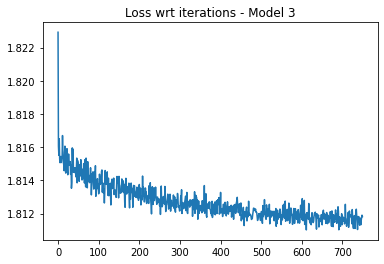

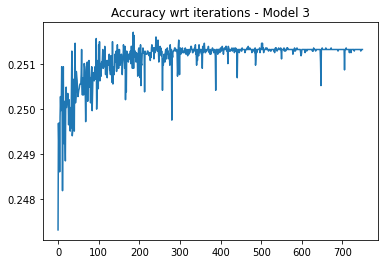

In [ ]:
plt.plot(model3.history.history['loss'])
plt.title('Loss wrt iterations - Model 3')
plt.figure()
plt.plot(model3.history.history['accuracy'])
plt.title('Accuracy wrt iterations - Model 3')




In [ ]:
performance_training = model3.evaluate(flatten_training_images,to_categorical(training_labels))
print("Accuracy on Val samples: {0}".format(performance_training[1]))
performance_testdata = model3.evaluate(flatten_testing_images, to_categorical(testing_labels))
performance_validation = model3.evaluate(flatten_validation_images,to_categorical(validation_labels))
print("Accuracy on Val samples: {0}".format(performance_validation[1]))
print("Accuracy on Test samples: {0}".format(performance_testdata[1]))

898/898 [==============================] - 5s 5ms/step - loss: 1.8134 - accuracy: 0.2513
Accuracy on Val samples: 0.2513149082660675
113/113 [==============================] - 1s 5ms/step - loss: 1.8157 - accuracy: 0.2494
Accuracy on Val samples: 0.24937307834625244
Accuracy on Test samples: 0.24491502344608307


In [ ]:
performance_testdata = model1.evaluate(flatten_testing_images, to_categorical(testing_labels))
print("Accuracy on Test samples: {0}".format(performance_testdata[1]))

NameError: ignored

**Image Classification with CNN'S**

In [ ]:

import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs
# Define 2 groups of layers: features layer (convolutions) and classification layer
features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25), Flatten(),]
classifier = [Dense(512, activation='relu'), Dense(7, activation='softmax'),]

cnn_model1 = Sequential(features+classifier)

print(cnn_model1.summary())  # Compare number of parameteres against FFN
cnn_model1.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

training_images_3d = training_images.reshape(28709,48,48,1)
testing_images_3d = testing_images.reshape(3589,48,48,1)
validation_images_3d = validation_images.reshape(3589,48,48,1)

%time cnn_model1.fit(training_images_3d, to_categorical(training_labels), epochs=300, batch_size=256,)
performance_1 = cnn_model1.evaluate(validation_images_3d, to_categorical(validation_labels))

print("Accuracy on validation samples: {0}".format(performance_1[1]))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 22, 22, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                  

In [ ]:
performance_1 = cnn_model1.evaluate(validation_images_3d, to_categorical(validation_labels))

print("Accuracy on validation samples: {0}".format(performance_1[1]))
performance_2 = cnn_model1.evaluate(training_images_3d, to_categorical(training_labels))

print("Accuracy on training samples: {0}".format(performance_2[1]))

113/113 [==============================] - 1s 8ms/step - loss: 1.1591 - accuracy: 0.5704
Accuracy on validation samples: 0.5703538656234741
898/898 [==============================] - 7s 7ms/step - loss: 0.8503 - accuracy: 0.6981
Accuracy on training samples: 0.6980738043785095


In [ ]:
# Define 2 groups of layers: features layer (convolutions) and classification layer
features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(30, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(50, kernel_size=3, activation='relu'), Dropout(0.5),
            Conv2D(60, kernel_size=3, activation='relu'), Dropout(0.25),
            Conv2D(10, kernel_size=4, activation= 'relu'), Dropout(0.25),
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25), Flatten(),]
classifier = [Dense(500, activation='relu'), Dense(7, activation='softmax'),]

cnn_model2 = Sequential(features+classifier)

print(cnn_model2.summary())  # Compare number of parameteres against FFN
cnn_model2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

training_images_3d = training_images.reshape(28709,48,48,1)
testing_images_3d = testing_images.reshape(3589,48,48,1)
validation_images_3d = validation_images.reshape(3589,48,48,1)

%time cnn_model2.fit(training_images_3d, to_categorical(training_labels), epochs=300, batch_size=1000,)
performance_2 = cnn_model2.evaluate(validation_images_3d, to_categorical(validation_labels))

print("Accuracy on validation samples: {0}".format(performance_2[1]))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 30)        8670      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 30)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 22, 22, 30)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 50)        13550     
                                                                 
 dropout_10 (Dropout)        (None, 20, 20, 50)        0         
                                                      

In [15]:
features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(64, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25),
            Conv2D(32, kernel_size=3, activation='relu'),
            Conv2D(20, kernel_size=3, activation='relu'),
            Conv2D(10, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Dropout(0.25), Flatten(),]
classifier = [Dense(100, activation='relu'), Dense(7, activation='softmax'),]

cnn_model3 = Sequential(features+classifier)

print(cnn_model3.summary())  # Compare number of parameteres against FFN
cnn_model3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

training_images_3d = training_images.reshape(28709,48,48,1)
testing_images_3d = testing_images.reshape(3589,48,48,1)
validation_images_3d = validation_images.reshape(3589,48,48,1)

%time cnn_model3.fit(training_images_3d, to_categorical(training_labels), epochs=30, batch_size=200,)
performance_3 = cnn_model3.evaluate(validation_images_3d, to_categorical(validation_labels))

print("Accuracy on Test samples: {0}".format(performance_3[1]))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 20)        5780      
                                                      

In [ ]:
plt.plot(cnn_model3.history.history['loss'])
plt.title('Loss wrt iterations - CNN_Model 3')
plt.figure()
plt.plot(cnn_model3.history.history['accuracy'])
plt.title('Accuracy wrt iterations - CNN_Model 3')

**d.ii**

In [8]:
performance_test = cnn_model1.evaluate(testing_images_3d, to_categorical(testing_labels))
print("Accuracy on Test samples: {0}".format(performance_test[1]))

NameError: ignored

**Bayesian Optimization**

In [ ]:

from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
import sys

In [ ]:

training_images_3d = training_images.reshape(28709,48,48,1)
testing_images_3d = testing_images.reshape(3589,48,48,1)
validation_images_3d = validation_images.reshape(3589,48,48,1)

space = {
    'num_layers':hp.choice('num_layers', [2, 3, 4]),
    'num_filters':hp.choice('num_filters', [12, 24, 36]),
    #'num_convolutions':hp.choice('num_convolutions', [2, 3, 4]),
    'dropout':hp.choice('dropout',[0,0.2,0.4]),
    #'kernel_size':hp.choice('kernel_size', [1,2,3]),
    'num_neurons':hp.choice('num_neurons',[100,200,500]),
}

def train_CNN_model(params):
  model_opt = Sequential()
  model_opt.add(Conv2D(filters = params['num_filters'], kernel_size=3, activation='relu', input_shape=(48,48,1)))
  model_opt.add(Conv2D(filters = params['num_filters'], kernel_size=3, activation='relu'))
  model_opt.add(Dropout(params['dropout']))

  if params['num_layers'] >= 3:
    model_opt.add(Conv2D(filters = params['num_filters'], kernel_size=3, activation='relu'))
    model_opt.add(Dropout(params['dropout']))        
    model_opt.add(MaxPooling2D(pool_size=(2,2)))
    model_opt.add(Dropout(params['dropout']))

  
  if params['num_layers'] == 4:
    model_opt.add(Conv2D(filters = params['num_filters'], kernel_size=3, activation='relu'))
    model_opt.add(MaxPooling2D(pool_size=(2,2)))
    model_opt.add(Dropout(params['dropout']))
    
  model_opt.add(Flatten())
  model_opt.add(Dense(params['num_neurons'],activation = 'relu'))
  model_opt.add(Dense(7, activation = 'sigmoid'))
  model_opt.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
  #print(model_opt.summary())  # Compare number of parameteres against FFN

  model_opt.fit(training_images_3d, to_categorical(training_labels), epochs=50, batch_size=500,verbose = 0)
  performance_opt_val = model_opt.evaluate(validation_images_3d, to_categorical(validation_labels))
  performance_opt_test = model_opt.evaluate(testing_images_3d,to_categorical(testing_labels))
  print("Accuracy on Validation samples: {0}".format(performance_opt_val[1]))
  print("Accuracy on Test samples: {0}".format(performance_opt_test[1]))
  sys.stdout.flush()
  return {'loss' : -performance_opt_val[1], 'status': STATUS_OK}

trials = Trials()
best_hyperparams = fmin(train_CNN_model,space, algo = tpe.suggest, max_evals = 10, trials = trials)
print(best_hyperparams)

  0%|          | 0/10 [02:59<?, ?it/s, best loss: ?]


KeyboardInterrupt: ignored

**F. Fine Tuning**

In [9]:
vgg16_model = VGG16(include_top = False, input_shape = (48,48,3))
vgg16_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [10]:
model = Sequential()
for layer in vgg16_model.layers:
  model.add(layer)

#Freeze layers
for layer in model.layers[:-2]:
  layer.trainable = False
model.add(Flatten())
model.add(Dense(7, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

In [11]:
training_images_3d = training_images.reshape(28709,48,48,1)
testing_images_3d = testing_images.reshape(3589,48,48,1)
validation_images_3d = validation_images.reshape(3589,48,48,1)

new_train = np.zeros(shape = (training_images_3d.shape[0],training_images_3d.shape[1],training_images_3d.shape[2],3))
#print(new.shape)
new_test = np.zeros(shape = (testing_images_3d.shape[0],testing_images_3d.shape[1],testing_images_3d.shape[2],3))
new_val = np.zeros(shape = (validation_images_3d.shape[0],validation_images_3d.shape[1],validation_images_3d.shape[2],3))

for i in range(training_images_3d.shape[0]):
  img = training_images_3d[i,:,:,0]
  new_train[i,:,:,0] = img
  new_train[i,:,:,1] = img
  new_train[i,:,:,2] = img

for i in range(validation_images_3d.shape[0]):
  img = validation_images_3d[i,:,:,0]
  new_val[i,:,:,0] = img
  new_val[i,:,:,1] = img
  new_val[i,:,:,2] = img

for i in range(testing_images_3d.shape[0]):
  img = testing_images_3d[i,:,:,0]
  new_test[i,:,:,0] = img
  new_test[i,:,:,1] = img
  new_test[i,:,:,2] = img

In [12]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)
%time model.fit(new_train, to_categorical(training_labels), epochs=20, batch_size=200,)

performance_finetuning = model.evaluate(new_val, to_categorical(validation_labels))
print("Accuracy on Val samples: {0}".format(performance_finetuning[1]))

performance_finetuning_test = model.evaluate(new_test, to_categorical(testing_labels))
print("Accuracy on Val samples: {0}".format(performance_finetuning_test[1]))

Epoch 1/20
144/144 [==============================] - 52s 129ms/step - loss: 1.6712 - accuracy: 0.3367
Epoch 2/20
144/144 [==============================] - 16s 114ms/step - loss: 1.5607 - accuracy: 0.3963
Epoch 3/20
144/144 [==============================] - 16s 113ms/step - loss: 1.5179 - accuracy: 0.4160
Epoch 4/20
144/144 [==============================] - 16s 113ms/step - loss: 1.4774 - accuracy: 0.4387
Epoch 5/20
144/144 [==============================] - 16s 113ms/step - loss: 1.4582 - accuracy: 0.4424
Epoch 6/20
144/144 [==============================] - 16s 113ms/step - loss: 1.4342 - accuracy: 0.4570
Epoch 7/20
144/144 [==============================] - 16s 113ms/step - loss: 1.4166 - accuracy: 0.4614
Epoch 8/20
144/144 [==============================] - 16s 113ms/step - loss: 1.3933 - accuracy: 0.4750
Epoch 9/20
144/144 [==============================] - 16s 113ms/step - loss: 1.3882 - accuracy: 0.4762
Epoch 10/20
144/144 [==============================] - 16s 113ms/step - l

In [13]:
model_2 = Sequential()
for layer in vgg16_model.layers:
  model_2.add(layer)

#Freeze layers
for layer in model_2.layers[:-1]:
  layer.trainable = False
model_2.add(Flatten())
model_2.add(Dense(20, activation = 'relu'))
model_2.add(Dense(7, activation = 'softmax'))
model_2.summary()

model_2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)
%time model_2.fit(new_train, to_categorical(training_labels), epochs=10, batch_size=500,)

performance_finetuning_model2 = model_2.evaluate(new_val, to_categorical(validation_labels))
print("Accuracy on Val samples: {0}".format(performance_finetuning_model2[1]))

performance_finetuning_test_model2 = model_2.evaluate(new_test, to_categorical(testing_labels))
print("Accuracy on Test samples: {0}".format(performance_finetuning_test_model2[1]))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)      

In [14]:
model_3 = Sequential()
for layer in vgg16_model.layers:
  model_3.add(layer)

#Freeze layers
for layer in model_3.layers:
  layer.trainable = False
model_3.add(Flatten())
model_3.add(Dense(20, activation = 'relu'))
model_3.add(Dense(10, activation = 'relu'))
model_3.add(Dense(7, activation = 'softmax'))
model_3.summary()

model_3.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)
%time model_3.fit(new_train, to_categorical(training_labels), epochs=30, batch_size=250,)

performance_finetuning_model3 = model_3.evaluate(new_val, to_categorical(validation_labels))
print("Accuracy on Val samples: {0}".format(performance_finetuning_model3[1]))

performance_finetuning_test_model3 = model_3.evaluate(new_test, to_categorical(testing_labels))
print("Accuracy on Test samples: {0}".format(performance_finetuning_test_model3[1]))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)      

**(e). Data Augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

#augmenting factors
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=120,
    width_shift_range=0.4,
    height_shift_range=0.1,
    horizontal_flip=True)
#Create new_data array
new_data = datagen.flow((training_images_3d, training_labels), batch_size=1)

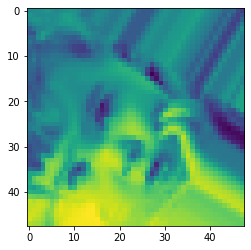

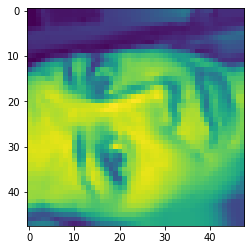

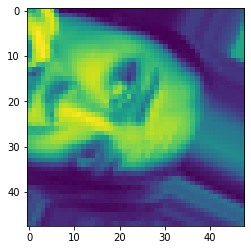

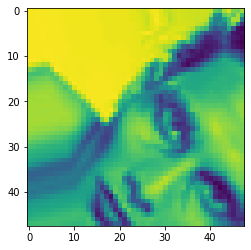

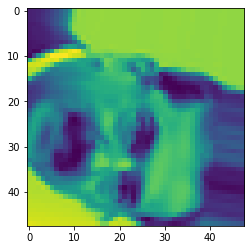

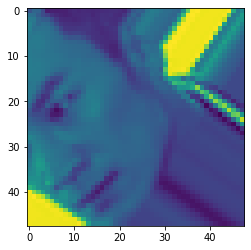

In [ ]:
plt.figure()
plt.imshow(np.squeeze(new_data[1][0]))
plt.figure()
plt.imshow(np.squeeze(new_data[5][0]))
plt.figure()
plt.imshow(np.squeeze(new_data[15][0]))
plt.figure()
plt.imshow(np.squeeze(new_data[8][0]))
plt.figure()
plt.imshow(np.squeeze(new_data[6][0]))
plt.figure()
plt.imshow(np.squeeze(new_data[9][0]))